[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/tmp/ipython-input-7-2981679013.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Title", y="Word Count", data=df.head(10), palette="Blues_d")
/tmp/ipython-input-7-2981679013.py:55: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


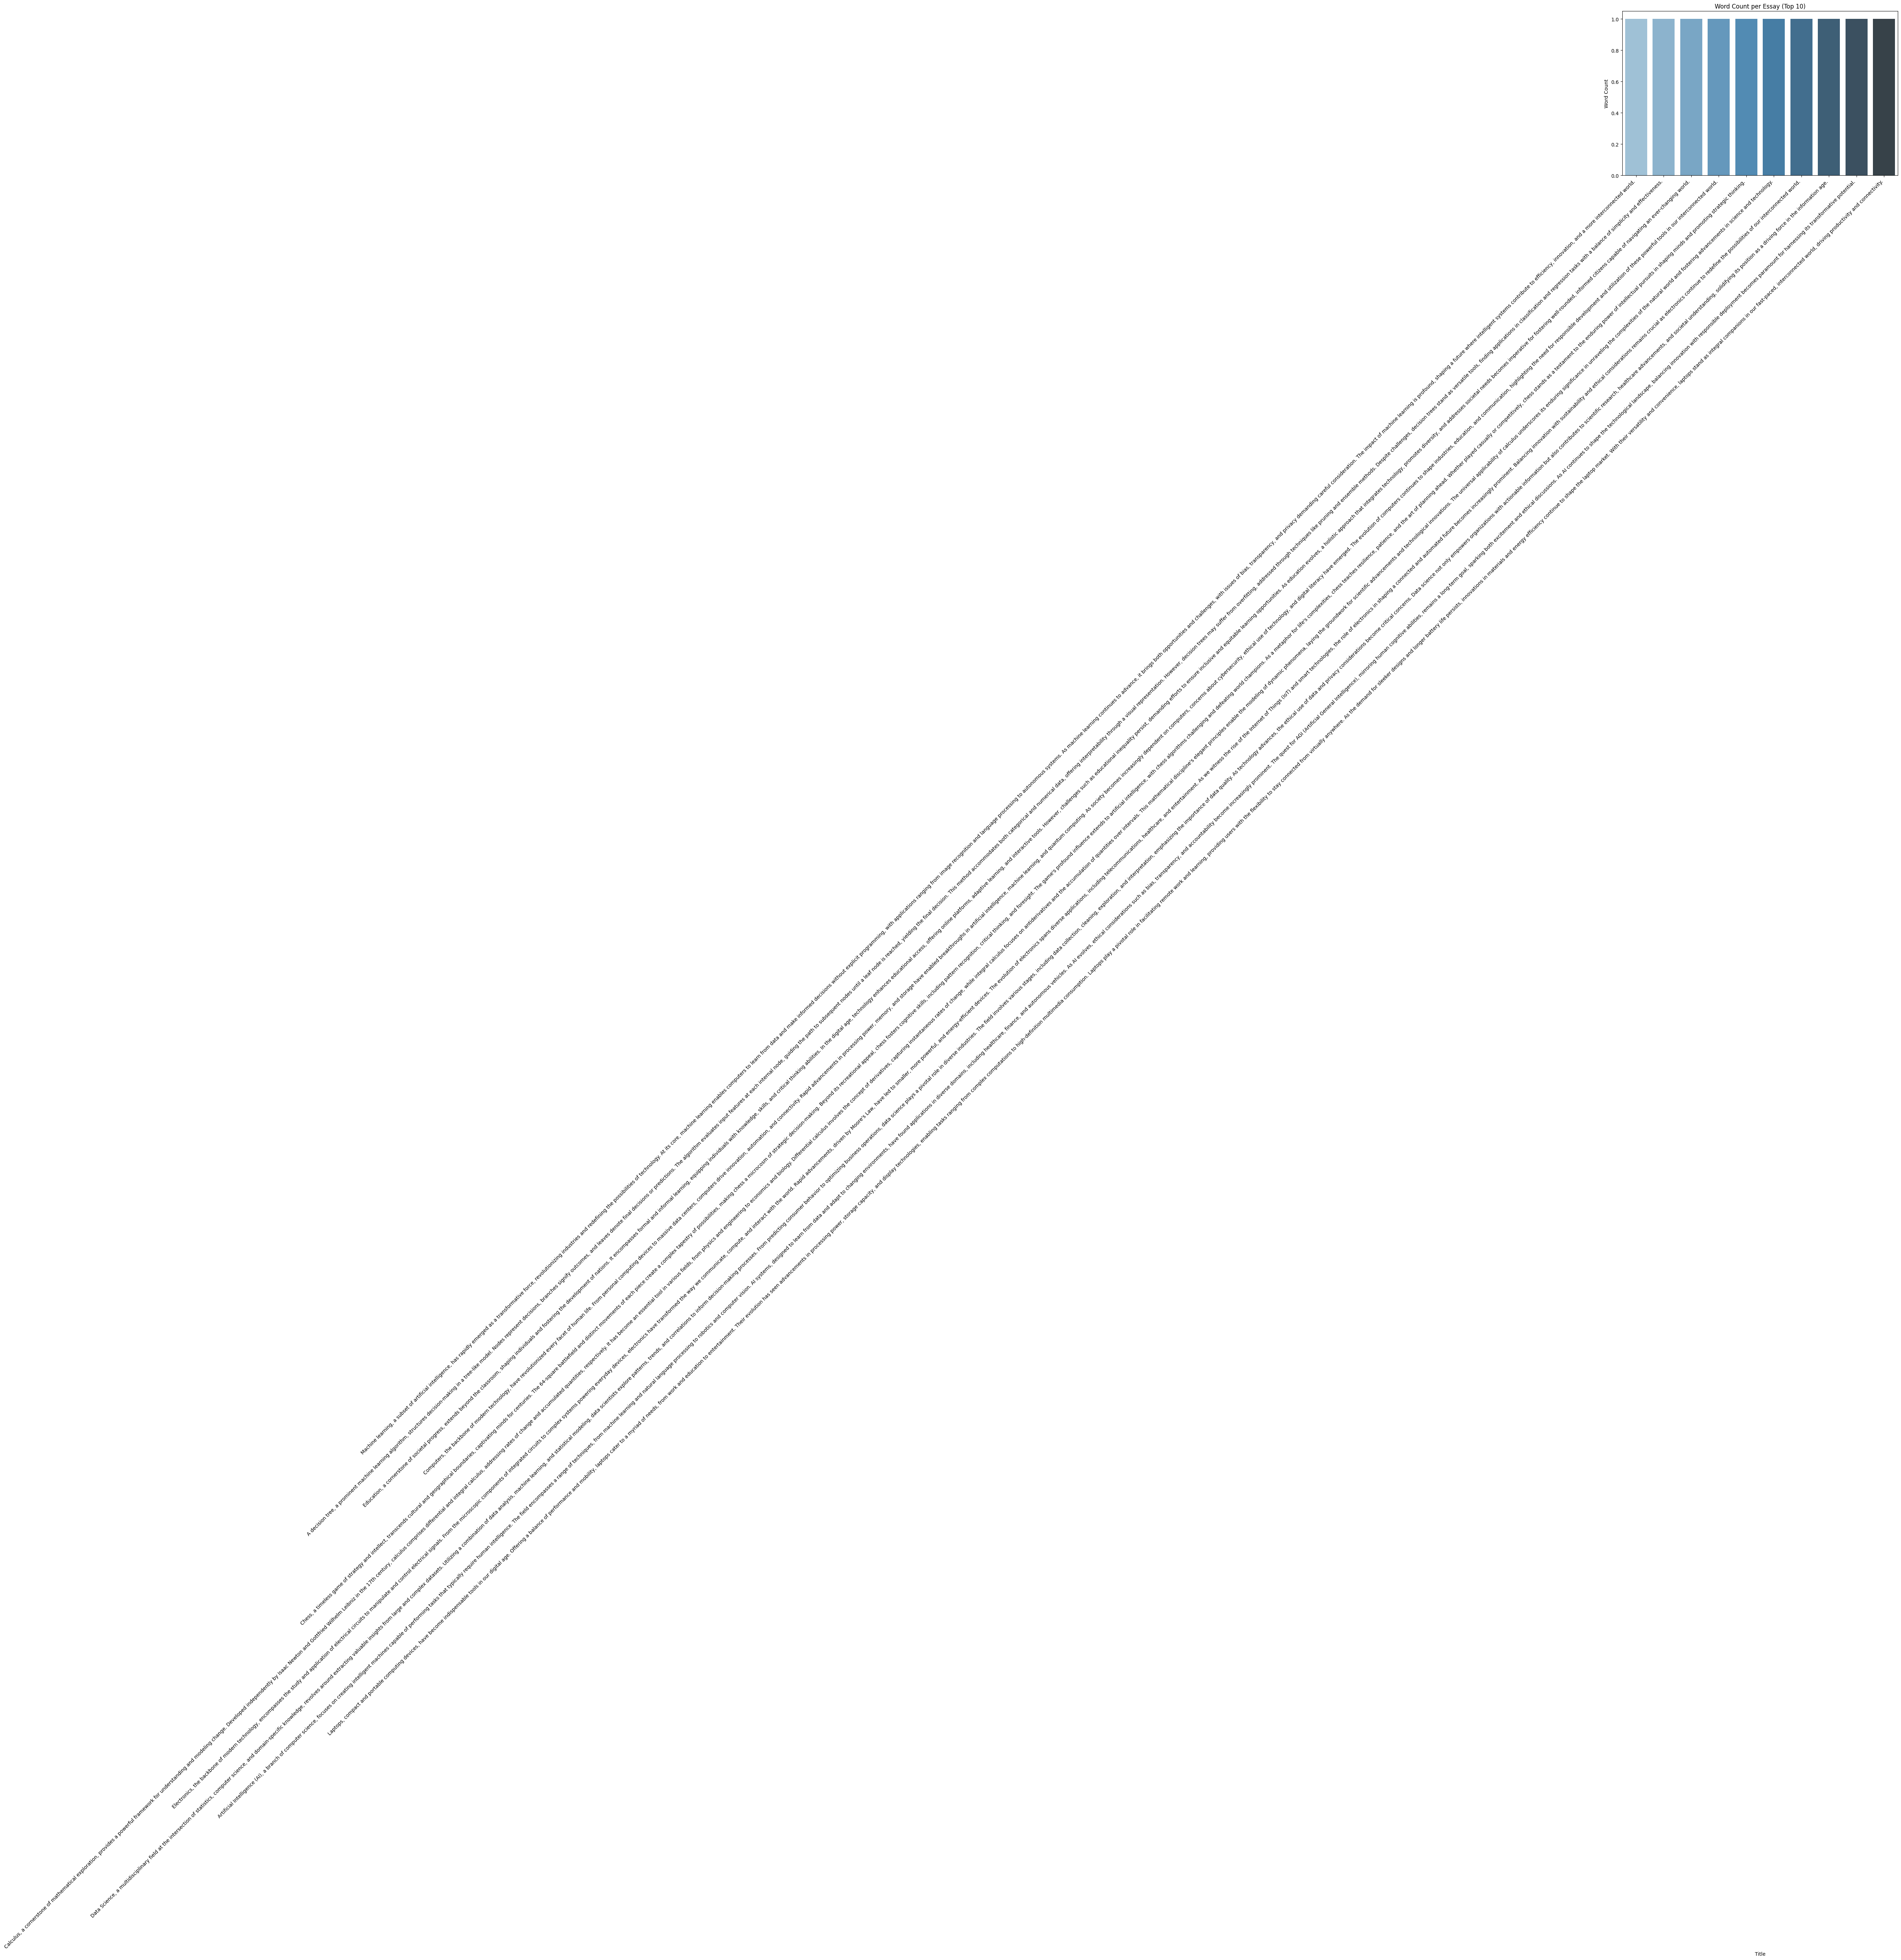

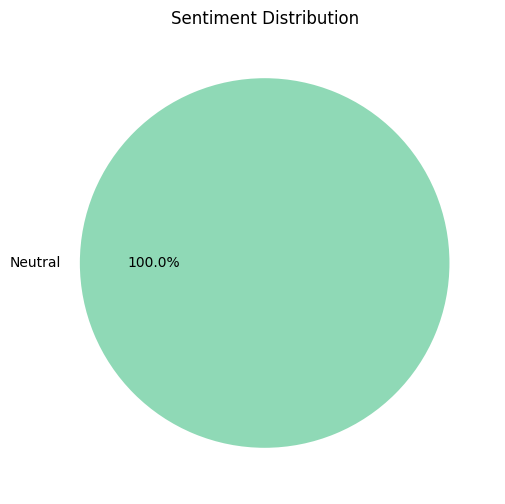

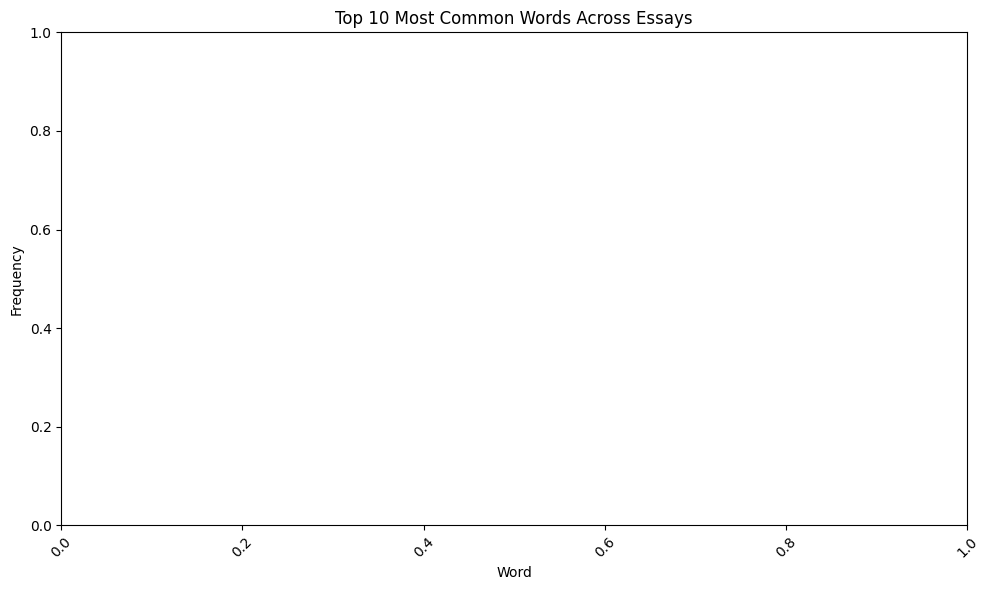

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import re

try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

try:
    nltk.data.find('sentiment/vader_lexicon')
except LookupError:
    nltk.download('vader_lexicon')

stop_words = set(stopwords.words('english'))
sia = SentimentIntensityAnalyzer()

def safe_tokenize(text):
    try:
        from nltk.tokenize import word_tokenize
        return word_tokenize(text)
    except:

        return re.findall(r'\b\w+\b', text.lower())

file_path = '/content/AI Generated Essays Dataset.csv'
df = pd.read_csv(file_path)

df.rename(columns={'text': 'Title', 'generated': 'Content'}, inplace=True)

df = df.dropna(subset=['Title', 'Content'])

df["Word Count"] = df["Content"].apply(lambda x: len(safe_tokenize(str(x))))

plt.figure(figsize=(10,6))
sns.barplot(x="Title", y="Word Count", data=df.head(10), palette="Blues_d")
plt.title("Word Count per Essay (Top 10)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

def get_sentiment_label(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment Score"] = df["Content"].apply(lambda x: sia.polarity_scores(str(x))['compound'])
df["Sentiment Label"] = df["Sentiment Score"].apply(get_sentiment_label)

sentiment_counts = df["Sentiment Label"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%',
        colors=["#8fd9b6", "#f7c59f", "#fc9d9a"])
plt.title("Sentiment Distribution")
plt.show()

def most_common_word(text):
    tokens = safe_tokenize(str(text).lower())
    filtered = [w for w in tokens if w.isalpha() and w not in stop_words]
    freq_dist = FreqDist(filtered)
    return freq_dist.max() if filtered else None

df["Most Common Word"] = df["Content"].apply(most_common_word)

top_common_words = df["Most Common Word"].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_common_words.index, y=top_common_words.values, palette="Oranges_r")
plt.title("Top 10 Most Common Words Across Essays")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
